In [1]:
import osmnx as ox

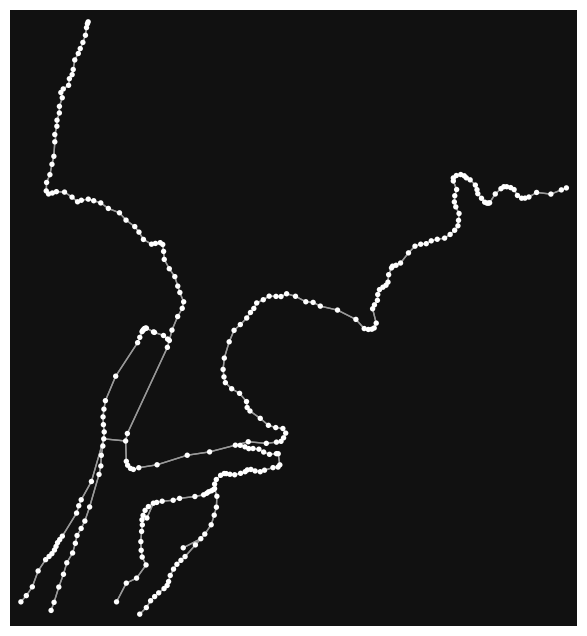

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [2]:
lat = 31.780373
lng = 76.988867

# lat = 31.783556
# lng = 76.992571

G = ox.graph_from_point((lat, lng), dist = 1000, dist_type="bbox", network_type='all',simplify=False)
ox.plot_graph(G)

In [3]:
gdf_nodes, gdf_edges = ox.graph_to_gdfs(G)
print(len(gdf_nodes))
print(len(gdf_edges))

293
586


In [6]:
gdf_nodes.head()

,y,x,street_count,geometry
osmid,,,,
2019312437,31.775840,76.983668,2,POINT (76.98367 31.77584)
2019312453,31.776218,76.985392,2,POINT (76.98539 31.77622)
2019312458,31.776319,76.986188,2,POINT (76.98619 31.77632)
2019312461,31.776522,76.987106,3,POINT (76.98711 31.77652)
2019312462,31.776578,76.988208,2,POINT (76.98821 31.77658)


In [5]:
gdf_edges.head()

osmid lanes    ref                name  \
u          v           key                                               
2019312437 2019335096  0    761379546     2  MDR23  Mandi-Bajaura Road   
           10092251565 0    761379546     2  MDR23  Mandi-Bajaura Road   
2019312453 10092251565 0    761379546     2  MDR23  Mandi-Bajaura Road   
           2019312458  0    761379546     2  MDR23  Mandi-Bajaura Road   
2019312458 2019312453  0    761379546     2  MDR23  Mandi-Bajaura Road   

                              highway  oneway  reversed   length bridge  \
u          v           key                                                
2019312437 2019335096  0    secondary   False     False   19.266    NaN   
           10092251565 0    secondary   False      True   62.254    NaN   
2019312453 10092251565 0    secondary   False     False  106.457    NaN   
           2019312458  0    secondary   False      True   76.122    NaN   
2019312458 2019312453  0    secondary   False     False   76.122    NaN   

                           access width  \
u          v           key                
2019312437 2019335096  0      NaN   NaN   
           10092251565 0      NaN   NaN   
2019312453 10092251565 0      NaN   NaN   
           2019312458  0      NaN   NaN   
2019312458 2019312453  0      NaN   NaN   

                                                                     geometry  
u          v           key                                                     
2019312437 2019335096  0    LINESTRING (76.98367 31.77584, 76.98347 31.77579)  
           10092251565 0    LINESTRING (76.98367 31.77584, 76.98432 31.77593)  
2019312453 10092251565 0    LINESTRING (76.98539 31.77622, 76.98432 31.77593)  
           2019312458  0    LINESTRING (76.98539 31.77622, 76.98619 31.77632)  
2019312458 2019312453  0    LINESTRING (76.98619 31.77632, 76.98539 31.77622)

In [57]:
min_lat = 0
min_lng = 0
distance = 100000000
for i,j in gdf_nodes.iterrows():
  temp_dis = ox.distance.great_circle_vec(lat,lng,j['y'],j['x'])
  if(temp_dis<distance):
    distance = temp_dis
    min_lat = j['y']
    min_lng = j['x']
print(min_lat,min_lng,distance)

31.7810219 76.9887312 73.28738778972324


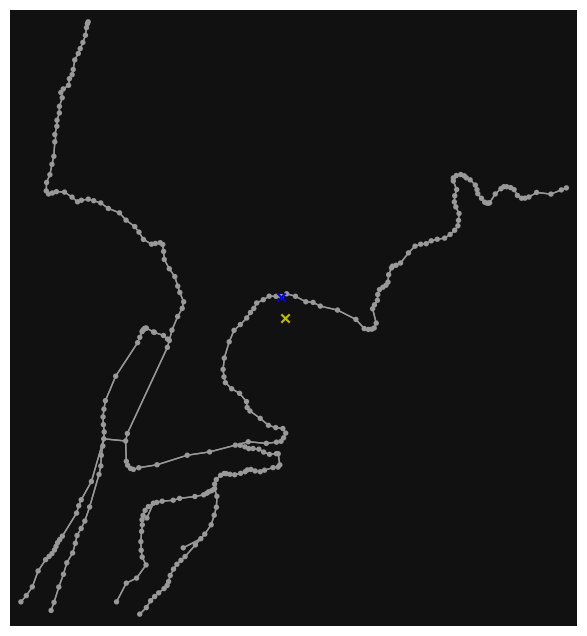

In [58]:
fig, ax = ox.plot_graph(G, node_color='#999999', show=False, close=False)
ax.scatter(lng, lat, c='y', marker='x')
ax.scatter(min_lng, min_lat, c='b', marker='x')

In [8]:
a,b,c = ox.nearest_edges(G, lng,lat)
print(a,b,c)
type(G.nodes[a])
print(f"Given point: {lat}, {lng}")
print(f"node1: {G.nodes[a]['y']}, {G.nodes[a]['x']}")
print(f"node1: {G.nodes[b]['y']}, {G.nodes[b]['x']}")

2201300539 2019312583 0
Given point: 31.780373, 76.988867
node1: 31.7810219, 76.9887312
node1: 31.7810269, 76.9885527


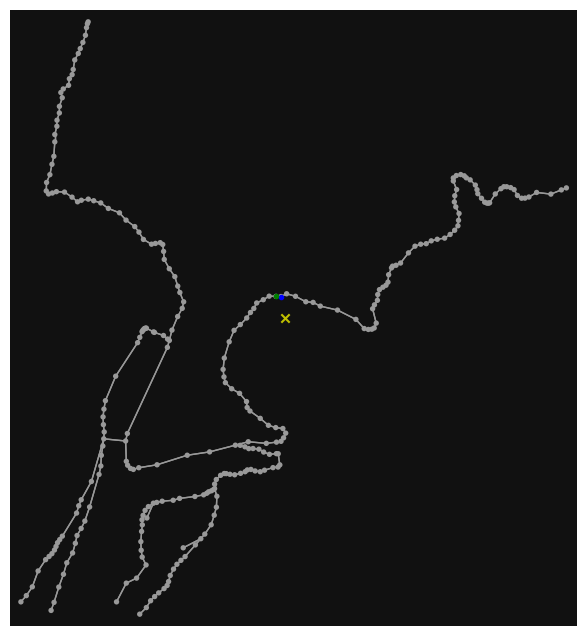

In [9]:
fig, ax = ox.plot_graph(G, node_color='#999999', show=False, close=False)
ax.scatter(lng, lat, c='y', marker='x')
ax.scatter(G.nodes[a]['x'], G.nodes[a]['y'], c='b', marker='.')
ax.scatter(G.nodes[b]['x'], G.nodes[b]['y'], c='g', marker='.')